<a href="https://colab.research.google.com/github/Charlie-Petty/IS_4487_Tokyo/blob/main/Copy_of_4487_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing necessary libraries

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# importing the csv file. You need to download this into Google Colab yourself to edit code.

df = pd.read_csv('/content/adviseinvest.csv')

In [4]:
# shows the first 5 rows of data in the csv file.
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [5]:
# shows the Dtype and the count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
# Shows basic stats for the each column in the database
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [7]:
# Shows that job is a discrete variable
print(df['job'].unique())
# what is the meaning behind job

[0 2 1 3]


In [8]:
# Average people answering the phone
# 54.6%

# income Targets
# 25%         $13,550
# 50%         $23,310
# 75%         $41,690

# Age Targets
# 25%         26.000000
# 50%         32.000000
# 75%         40.000000



# IGNORE THIS CODE. THIS IS A LOGIT MODEL WE WILL NOT BE USING.

In [9]:


import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with columns for independent variables and 'answered' for the binary dependent variable
# Example:
# df = pd.DataFrame({'independent_var1': [values], 'independent_var2': [values], ..., 'answered': [0 or 1]})

# Drop rows with missing values if any
df.dropna(inplace=True)

# Define your independent variables (X) and dependent variable (y)
X = df.drop('answered', axis=1)
y = df['answered']

# Convert infinite values to NaN and drop rows with NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Align y with the modified X
y = y.loc[X.index]

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)

# Obtain the results
result = logit_model.fit()

# Print summary of the regression results
print(result.summary())


         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               answered   No. Observations:                29502
Model:                          Logit   Df Residuals:                    29488
Method:                           MLE   Df Model:                           13
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        08:31:38   Log-Likelihood:            -9.1146e-06
converged:                      False   LL-Null:                       -20321.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -19.1814   9004.252     -0.002      0.998   -1.77e+04    1.76e+04
income         -7.689e-06      0.016     -0.000      1.000      -0.032       0.032
female            -0.1666   2240.267

In [10]:
# 1a Dropping all of the variables and than seeing the count.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29502 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29502 non-null  int64  
 1   income          29502 non-null  int64  
 2   female          29502 non-null  int64  
 3   age             29502 non-null  int64  
 4   job             29502 non-null  int64  
 5   num_dependents  29502 non-null  int64  
 6   rent            29502 non-null  int64  
 7   own_res         29502 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29502 non-null  int64  
 10  sav_acct        29502 non-null  int64  
 11  num_accts       29502 non-null  int64  
 12  mobile          29502 non-null  int64  
 13  product         29502 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 4.4 MB


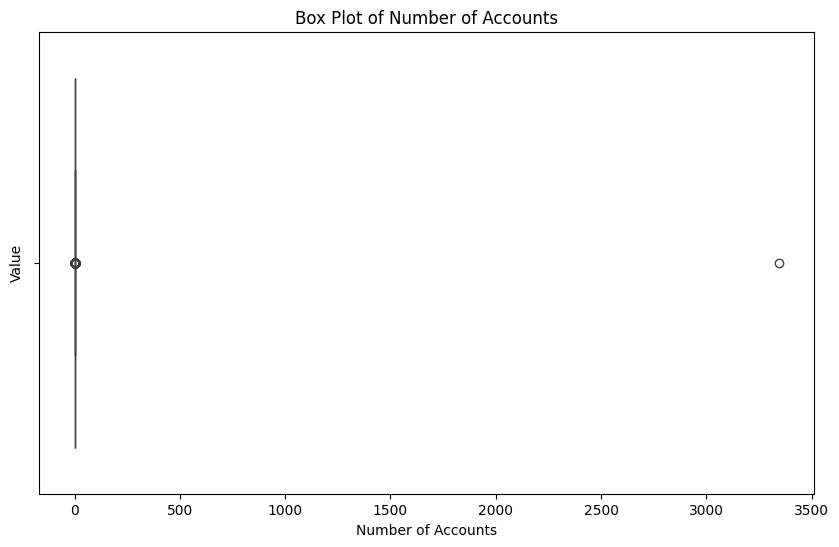

In [11]:
#we had a lot of problems dealing with getting the labels working in
#seaborne so I had gemini fix the issue

fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes

sns.boxplot(x=df['num_accts'], ax=ax)  # Plot on the axes

ax.set_xlabel("Number of Accounts")  # Set labels using the axes object
ax.set_ylabel('Value')
ax.set_title('Box Plot of Number of Accounts')

plt.show()

#Here's our origional code for the boxplot. The titles believe they are overwritten somewhere but everything else runs smoothly

 1b Showing the outliers through a boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num_accts'])
plt.xlabel('Number of Accounts')
plt.ylabel('Value')
plt.title('Box Plot of Number of Accounts')
plt.show()

#We followed this same code format for the rest of the models

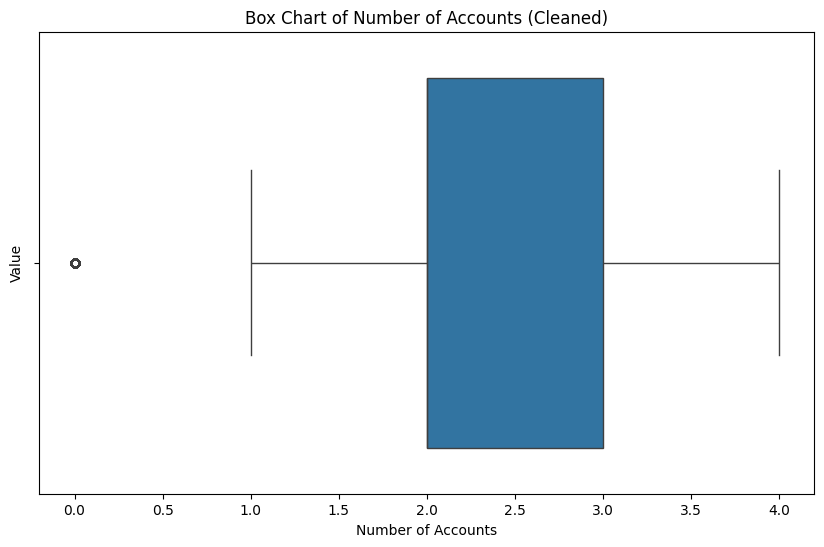

In [12]:
# 1b boxplot after the outliers are clean
df_cleaned = df[df['num_accts'] < 2000]

fig, ax = plt.subplots(figsize=(10, 6))  # Create figure and axes

sns.boxplot(x=df_cleaned['num_accts'], ax=ax)  # Plot on the axes

ax.set_xlabel("Number of Accounts")  # Set labels using the axes object
ax.set_ylabel('Value')
ax.set_title('Box Chart of Number of Accounts (Cleaned)')  # Modified title

plt.show()


In [13]:
# Droping the last outlier and showing the rows of income
df_cd = df_cleaned[df_cleaned['income'] >= 0]

df_cd['income'].unique()


array([ 13520,  14780,  37570,  12450,  12400,  14030,   9320,  11750,
        69670,   3380,  40200,  14730,  68500,   7010,  19500,  21340,
        12360,  27790,  12830,  19250,  50030,  35180,  27450,  15460,
         7950,  68360,  12460,  12820,  28720,  23310,   7300,  20730,
        12620,   9310,  14420,  47950,  24040,  31860,  38500,  18640,
        35520,  19570,  48170,  21460,  21080,  83180,  27600,  18370,
        14180,  53020,  34410,  23150,  29690,   8460,  63040,  12870,
        64580,  10550,   4260,  10920,  13300,  45910,   2760,  27120,
        27820, 126800,  17660,  12850,  19220,  10680,  42810,  14120,
        12950,  30510,  15160,  17550,  14740,  11490,  19080,   4330,
        21410,  11680,  10380,  83350,  25220,  48110,  40570,   6250,
       145550,  71740,  12640,  11690,  25790,  20580,  31080,  75820,
        39720,   9600,  31610,  13310,  50960,  23660,  60780,  80860,
        25070,   7660,  59540,  52340,  15250,  14240,  33940,  26290,
      

In [14]:
# Running a for loop to change some variables to categorical
categorical_columns = ['job', 'product', 'chk_acct', 'sav_acct']

for col in categorical_columns:
    df_cd[col] = df_cd[col].astype('category')

df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  int64   
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  int64   
 13  product         29499 non-null  category
dtypes: category(4), float64(1), int64(9)
memory usage: 2.6 MB


<ipython-input-14-c938f959157f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd[col] = df_cd[col].astype('category')


In [15]:
# Calculate and report the mean of "answered" after cleaning the dataset.  Because "answered" is coded 0/1 this is as simple as calculating the proportion of 1s in that series with

df_cd['answered'].mean()

0.5465947998237228

DAY 2


In [16]:
# Making the answered variable defined as yes or no and making it categorical
df_cd.loc[:, 'answered'] = df_cd['answered'].map({0: 'no', 1: 'yes'})

df_cd['answered'] = df_cd['answered'].astype('category')

print(df_cd.info())


print(df_cd['answered'].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  int64   
 13  product         29499 non-null  category
dtypes: category(5), float64(1), int64(8)
memory usage: 2.4 MB
None
['yes', 'no']
Categories (2, object): ['no', 'yes']


<ipython-input-16-ab886732fab9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['answered'] = df_cd['answered'].astype('category')


In [17]:
# printing income and answered first 5 rows of data
cd_df = df_cd[['income', 'answered']]
cd_df.head(5)

,income,answered
0,13520,yes
1,14780,no
2,37570,yes
3,12450,no
4,12400,no


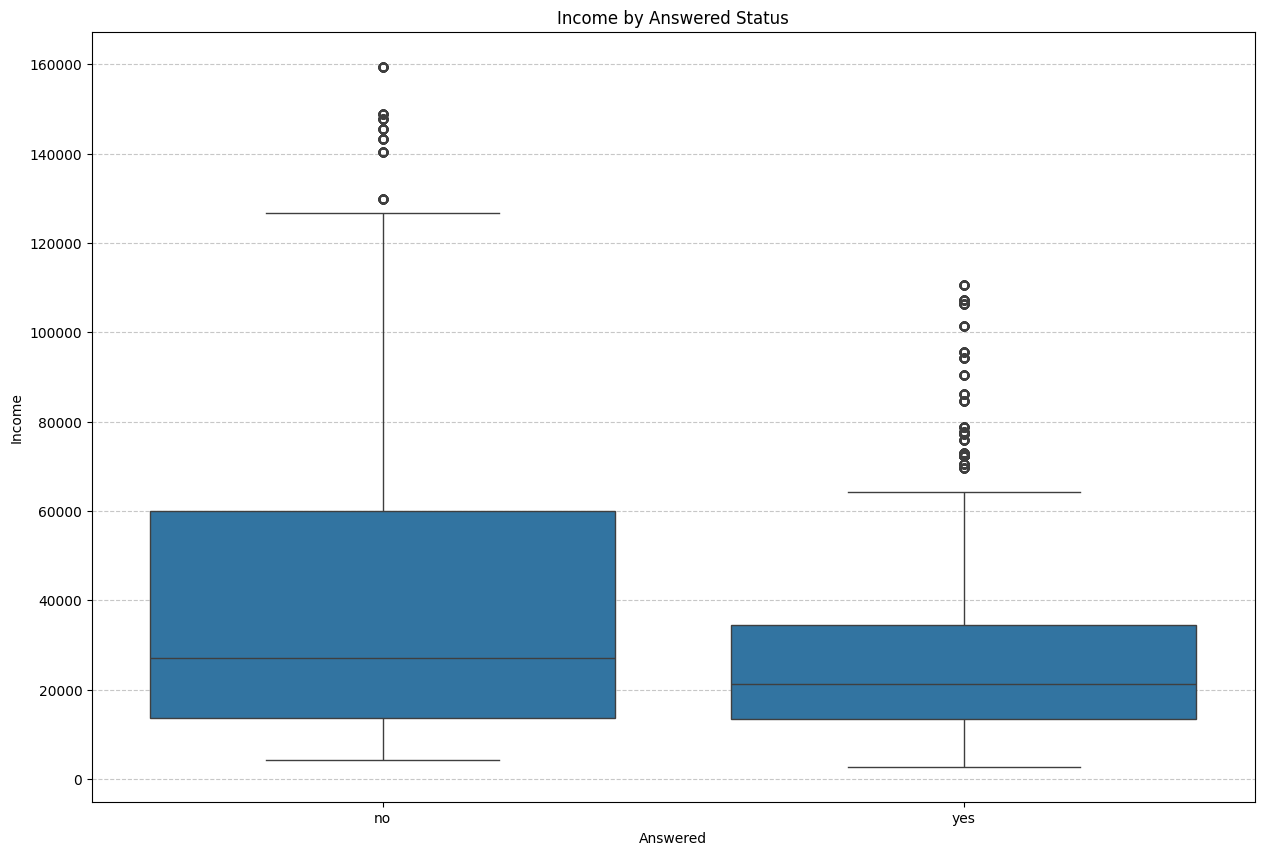

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes

sns.boxplot(x='answered', y='income', data=df_cd, ax=ax)  # Plot on the axes

# Set labels and title using the axes object
ax.set_title('Income by Answered Status')
ax.set_xlabel('Answered')
ax.set_ylabel('Income')

ax.grid(axis='y', linestyle='--', alpha=0.7)  # Apply grid to the axes

plt.show()

In this graph we can observe that people with a higher income are more likely not to answer on average.

In [19]:
# Redefines the variable mobile as yes or no in categorical data.
df_cd.loc[:, 'mobile'] = df_cd['mobile'].map({0: 'no', 1: 'yes'})

df_cd['mobile'] = df_cd['mobile'].astype('category')


<ipython-input-19-d504569fc566>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['mobile'] = df_cd['mobile'].astype('category')


In [20]:
answered_counts = df_cd.groupby('mobile')['answered'].value_counts().unstack(fill_value=0)

# Display the table of counts
print("Table of Counts for 'answered' at Each Level of 'mobile':")
print(answered_counts)

Table of Counts for 'answered' at Each Level of 'mobile':
answered     no    yes
mobile                
no        12671  14141
yes         704   1983


In [21]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  category
 13  product         29499 non-null  category
dtypes: category(6), float64(1), int64(7)
memory usage: 2.2 MB


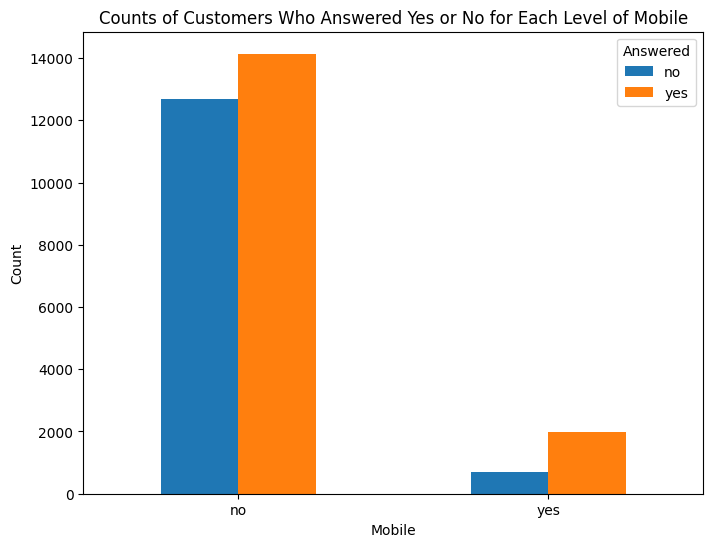

In [22]:
# Plotting a bar graph for Mobile and Answered.

counts = df_cd.groupby(['mobile', 'answered']).size().unstack()

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create figure and axes

counts.plot(kind='bar', stacked=False, ax=ax)  # Plot on the axes

# Set labels and title using the axes object
ax.set_title('Counts of Customers Who Answered Yes or No for Each Level of Mobile')
ax.set_xlabel('Mobile')
ax.set_ylabel('Count')

ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
ax.legend(title='Answered')

plt.show()

In [23]:
# Practicing logs -- UNIMPORTANT
import numpy as nm
import math
results = math.log2(8)
print(results)

3.0


In [24]:
# Calculating Entropy -- Also UNIMPORTANT

results_entropy = 0.6*math.log2(0.6)-0.4*math.log2(0.4)
print(results_entropy)

0.08659188145522112


In [25]:
# Calculate the counts for each category
count_yes_no = df_cd['answered'].value_counts()

# Calculate the percentages
percent_yes_no = df_cd['answered'].value_counts(normalize=True) * 100

# Create a DataFrame to display the counts and percentages
result_table = pd.DataFrame({
    'Count': count_yes_no,
    'Percentage': percent_yes_no.round(3)
})

# Rename the index to 'Answered' for better clarity
result_table.index.name = 'Answered'

# Print the result table
print(result_table)

          Count  Percentage
Answered                   
yes       16124      54.659
no        13375      45.341


In [26]:
# Import libraries for decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree



In [27]:
# Head the variables that we are going to be using

cd_df = df_cd[['income', 'answered']]
cd_df.head(5)


,income,answered
0,13520,yes
1,14780,no
2,37570,yes
3,12450,no
4,12400,no


In [28]:
# What calculation and depth we are going to use for the model.

df_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=2)

In [29]:
# Defining the variables we are going to be using for the model.
df_tree = df_tree.fit(X = df_cd[['income']],
                            y = df_cd['answered'])

[Text(0.6, 0.8333333333333334, "['answered, income'] <= 111910.0\nentropy = 0.994\nsamples = 29499\nvalue = [13375, 16124]\nclass = No"),
 Text(0.4, 0.5, "['answered, income'] <= 39135.0\nentropy = 0.988\nsamples = 28539\nvalue = [12415, 16124]\nclass = No"),
 Text(0.2, 0.16666666666666666, 'entropy = 0.962\nsamples = 21436\nvalue = [8256, 13180]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.979\nsamples = 7103\nvalue = [4159, 2944]\nclass = Yes'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 960\nvalue = [960, 0]\nclass = Yes')]

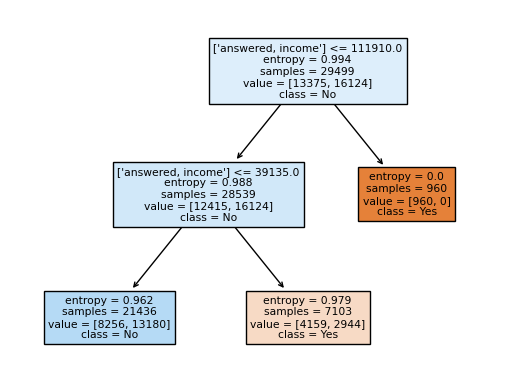

In [30]:
# How the model is going to look and printing it.
plot_tree(df_tree,
          feature_names=[['answered, income']],
          class_names=['Yes', 'No'],
          filled=True)

In [31]:
# Predicting the income outcome for the decision tree

pred = df_tree.predict(X = df_cd[['income']])

pred

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'no'], dtype=object)

In [32]:
# Prediction accuracy

(pred == df_cd['answered']).sum() / len(df_cd)

0.6203261127495847

Begin where you left off on the last question of the previous assignment.

Additionally, split the AdviseInvest data into a train set and a test set.  80% of the data should go into train and the remaining 20% into the test set.

Fit a new tree model of answered using all the predictors in the train set. We'll call this the "tree model."

Do not include product as a predictor in the model! It indicates whether a customer purchased, which happens after they answered the phone, and therefore cannot be used predictively.
Make sure to clean the data (both train and test sets should be cleaned identically) as you did for the previous assignment, but leave the categorical variables as is (coded numerically). The decision tree classifier in python requires all numeric inputs.

For creating the tree, set the max tree depth at 5.  
Create a visualization of the tree model on the train set. For the purposes of the visualization, set the max depth at 2.  Upload a screen shot of the visualization.
Identify the top 2 most important predictors in this model.

In [33]:
# Divide the data into train and test
train = df_cd.sample(frac=0.8, random_state=200)
test = df_cd.drop(train.index)


In [34]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  category
 13  product         29499 non-null  category
dtypes: category(6), float64(1), int64(7)
memory usage: 3.2 MB


In [35]:
# convert categorical variables back to numeric values
train['job'] = train['job'].astype('int')
train['answered'] = train['answered'].cat.codes
train['chk_acct'] = train['chk_acct'].cat.codes
train['sav_acct'] = train['sav_acct'].cat.codes

In [36]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29499 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  int64   
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  int64   
 6   rent            29499 non-null  int64   
 7   own_res         29499 non-null  int64   
 8   new_car         29499 non-null  float64 
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  int64   
 12  mobile          29499 non-null  category
 13  product         29499 non-null  category
dtypes: category(6), float64(1), int64(7)
memory usage: 3.2 MB


In [37]:


X_train = df_cd.drop(columns=['answered', 'product'])
y_train = df_cd['answered']

X_test = test.drop(columns=['answered', 'product'])
y_test = test['answered']



In [38]:
# prompt: Fit a new tree model of answered using all the predictors in the train set. We'll call this the "tree model."

from sklearn.preprocessing import LabelEncoder

# 3. Fit the decision tree classifier
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_model.fit(X_train, y_train)

# Encode categorical variables
label_encoders = {}
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Encode the target variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# Train the decision tree classifier
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.Series(tree_model.feature_importances_, index=X_train.columns)

# Display feature importance
print(feature_importance)


ValueError: could not convert string to float: 'yes'

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Separate features and target variable in train and test sets
X_train = train.drop(columns=['answered', 'product'])
y_train = train['answered']

X_test = test.drop(columns=['answered', 'product'])
y_test = test['answered']

# Encode categorical variables
label_encoders = {}
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le



In [40]:
# Encode the target variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# Train the decision tree classifier
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5)
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5)

[Text(0.5, 0.875, 'chk_acct <= 2.5\ngini = 0.496\nsamples = 23599\nvalue = [10754, 12845]\nclass = No'),
 Text(0.25, 0.625, 'income <= 79840.0\ngini = 0.485\nsamples = 15384\nvalue = [9012, 6372]\nclass = Yes'),
 Text(0.125, 0.375, 'mobile <= 0.5\ngini = 0.494\nsamples = 13999\nvalue = [7779, 6220]\nclass = Yes'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'chk_acct <= 0.5\ngini = 0.195\nsamples = 1385\nvalue = [1233, 152]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'income <= 38910.0\ngini = 0.334\nsamples = 8215\nvalue = [1742, 6473]\nclass = No'),
 Text(0.625, 0.375, 'age <= 22.5\ngini = 0.224\nsamples = 6456\nvalue = [830, 5626]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'num_accts <= 1.5\ngini = 0.499\nsamples = 1759\nvalue = [912, 847]\nclass = Yes'),
 Text(0.8125, 0.125, '\n  (...)  \n'),

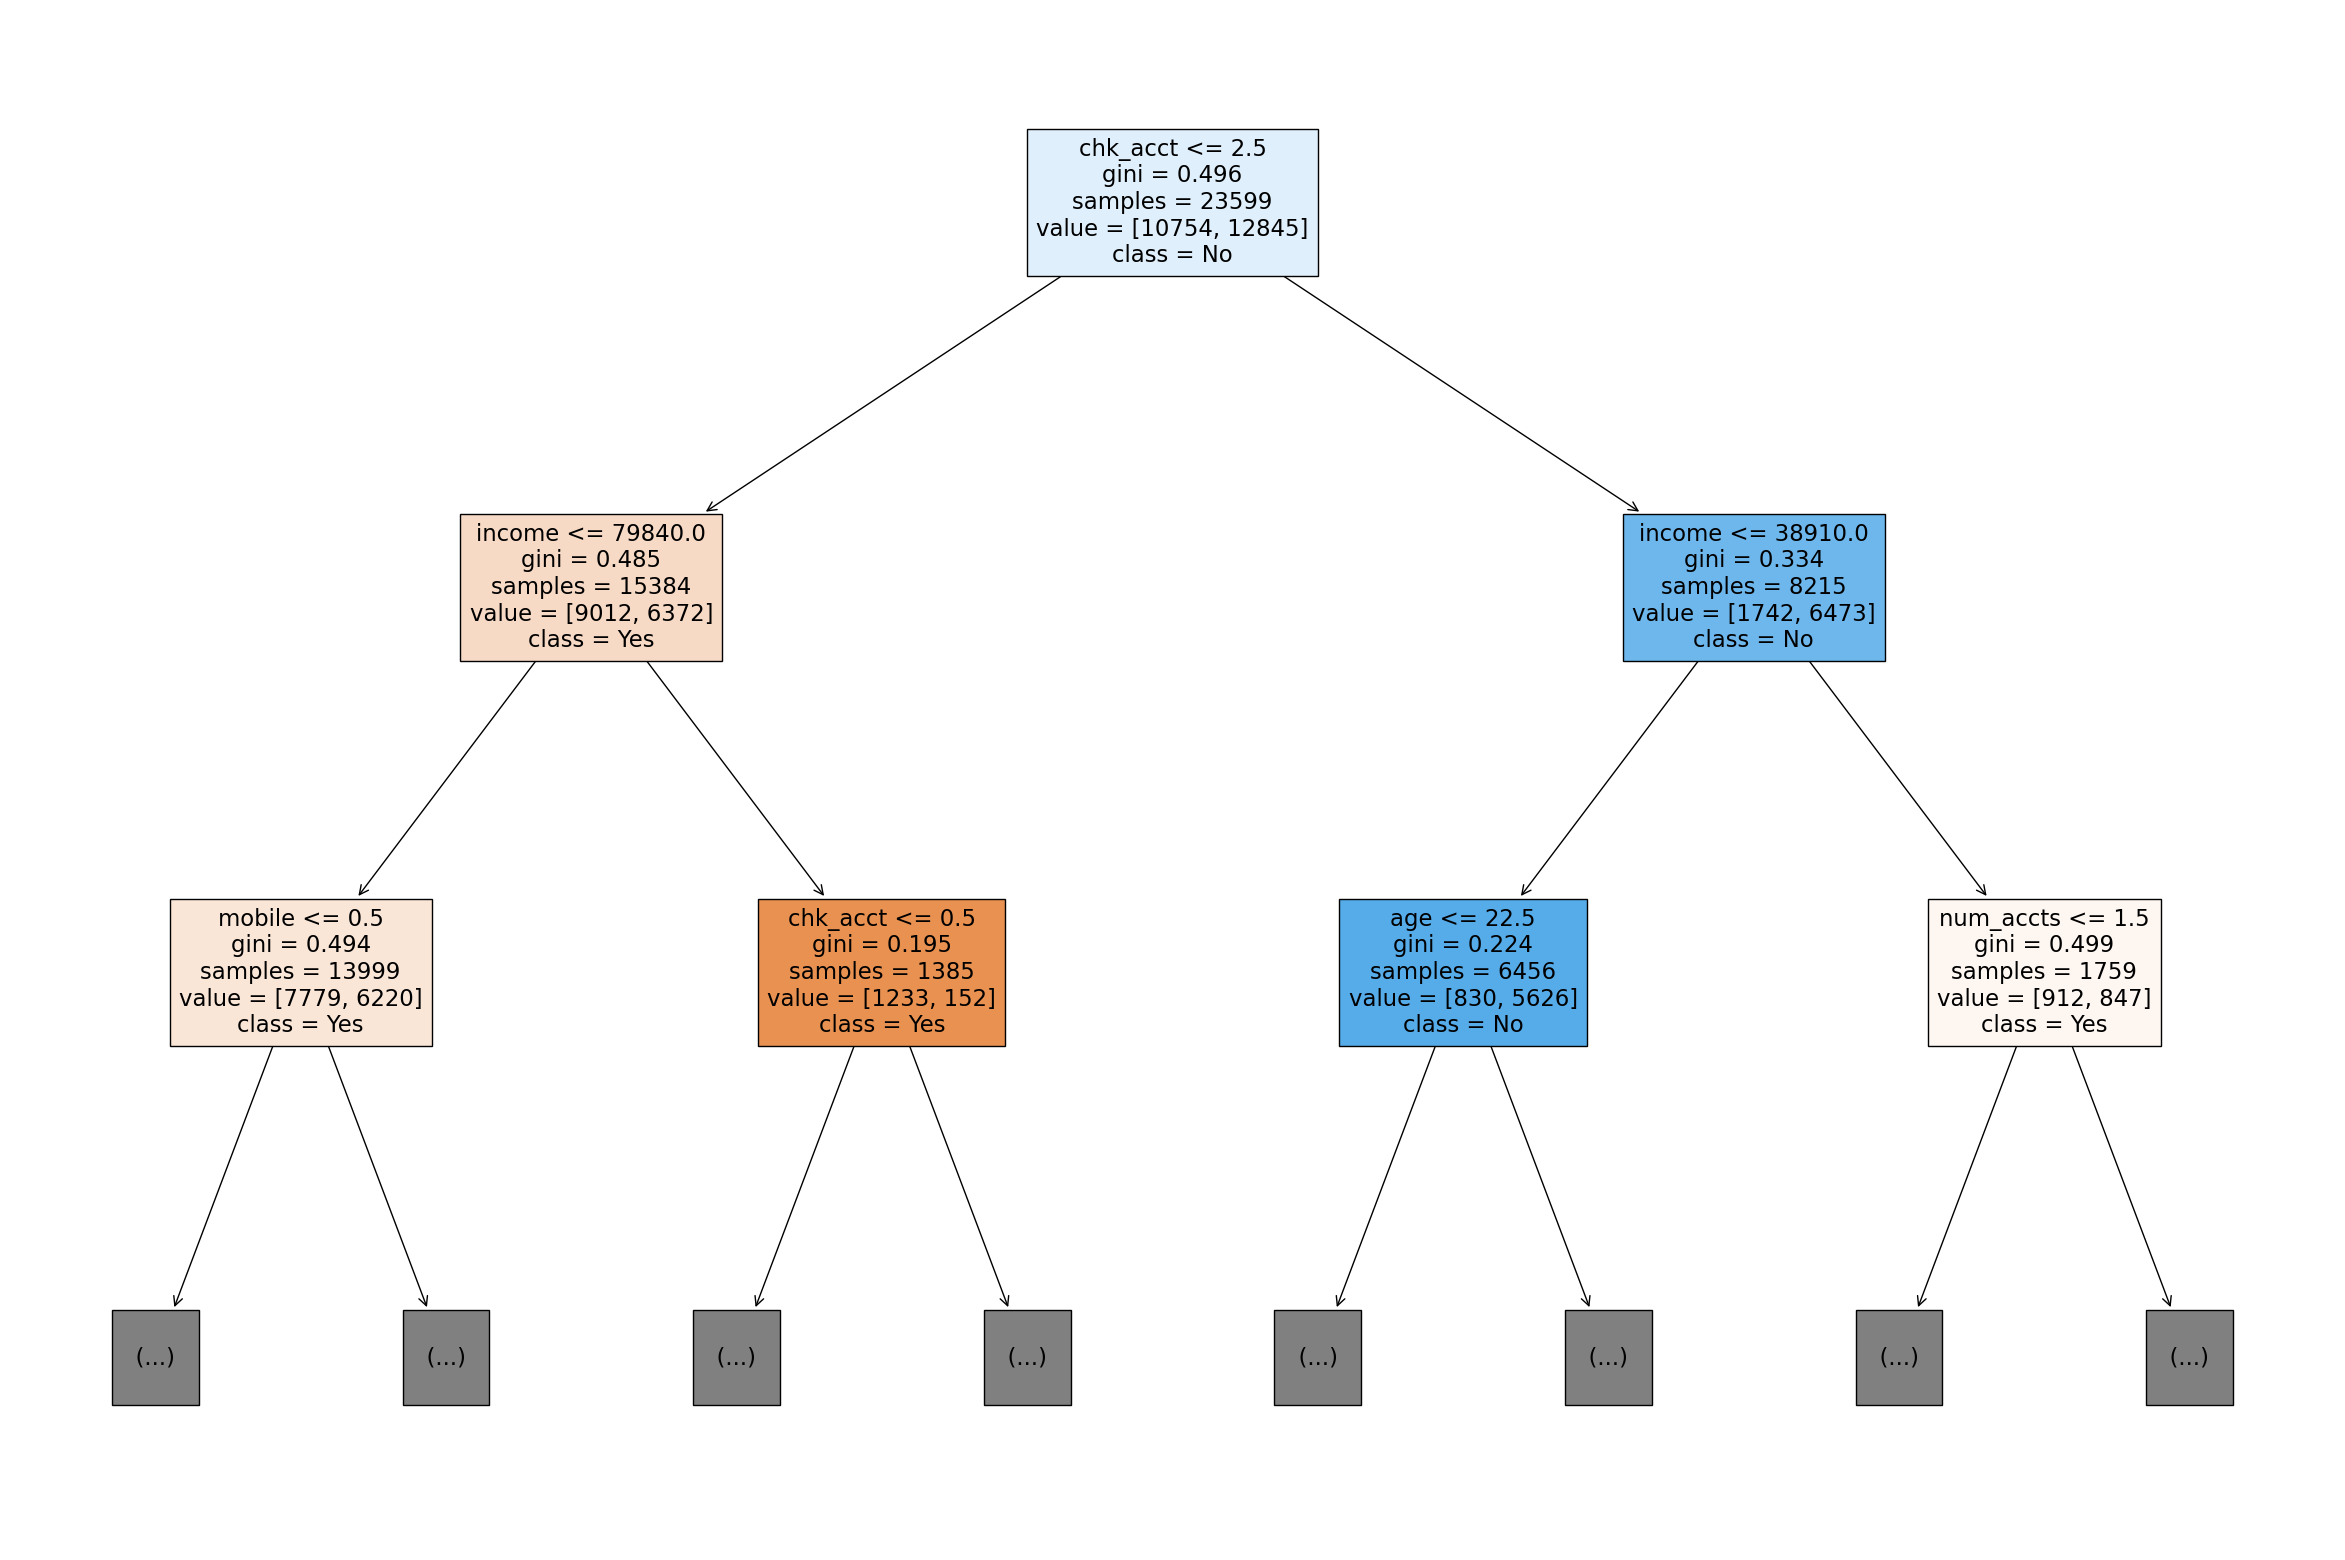

In [41]:

#Adjust the size of the visualization
plt.figure(figsize=(30,20))

# Plot the tree with feature names and class names
plot_tree(tree_model,
          feature_names = X_train.columns,
          class_names=['Yes', 'No'],
          filled=True,
          max_depth=2) # reduce depth for legibility



In [42]:
(tree_model.predict(X_train) == y_train).mean()

0.7679986440103395

In [43]:
(tree_model.predict(X_test) == y_test).mean()

0.7672881355932203

Instructions

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model answered in this case is therefore equivalent to modeling purchased.

There are costs and benefits in this case. We will assume that customers purchase a product for $100 dollars. The company investment in making the sale is $25. Profit is therefore $75 dollars for an answered call, which, we assume, will result in a purchase. In sum:

Benefit: True positive. The customer is predicted to answer, does answer, and purchases a product for $100 for a profit of 100 - 25 = $75.
Cost: False positive. The customer is predicted to answer, but does not answer, so there is a loss of $25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)
For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

You should split the data into a train set with 80% of the data and a test set with 20%.  Use random_state = 200 in the sample() function when splitting the data. This will ensure that you are working with the correct data.

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29502 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29502 non-null  int64  
 1   income          29502 non-null  int64  
 2   female          29502 non-null  int64  
 3   age             29502 non-null  int64  
 4   job             29502 non-null  int64  
 5   num_dependents  29502 non-null  int64  
 6   rent            29502 non-null  int64  
 7   own_res         29502 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29502 non-null  int64  
 10  sav_acct        29502 non-null  int64  
 11  num_accts       29502 non-null  int64  
 12  mobile          29502 non-null  int64  
 13  product         29502 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 4.4 MB


In [46]:
# fit model to the train set
train = df_cd.sample(frac=0.8, random_state=200)
test = df_cd.drop(train.index)

# EXCLUDE 'answered' from x_train and x_test
x_train = train.drop(columns=['answered', 'product'])
y_train = train['answered']

x_test = test.drop(columns=['answered', 'product'])
y_test = test['answered']

# Convert 'yes' and 'no' in y_train and y_test to numerical labels (0 and 1)
# Use .astype(int) to change the data type of the Series to integer
y_train = y_train.replace({'yes': 1, 'no': 0}).astype(int)
y_test = y_test.replace({'yes': 1, 'no': 0}).astype(int)

# Verify the changes
print(y_train.unique()) # Expected output: [1 0]
print(y_train.dtype) # Verify the data type is now integer

#fit the model on the train set
d_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
d_model = d_model.fit(x_train, y_train)

[1 0]
int64


ValueError: could not convert string to float: 'no'

In [ ]:
# fit model to the train set

# Define X and y in train and test

In [ ]:
# 3.  Initialize model, specifying max_depth = 4
# 4. Fit model to train data

In [ ]:
# get model accuracy for test data
pred_labels = tree_model.predict(x_test) # Remove the keyword argument 'x'
pred_labels[:20,]

In [ ]:
pred_labels = tree_model.predict(x_test) # Remove the keyword argument 'x'
pred_labels[:20,]

pred_prob = tree_model.predict_proba(x_test)

pred_labels = np.where(pred_prob[:,0] < 0.5, 1, 0)
pred_labels[:20,]

In [ ]:
# Generate the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

In [47]:
# prompt: give me the code to find the number of people who have an income over 79,840

len(df_cd[df_cd['income'] > 79840])


2496

In [48]:
# prompt: now give me the code to find how many of those people picked up the phone

len(df_cd[(df_cd['income'] > 79840) & (df_cd['answered'] == 'yes')])


576

In [49]:
# prompt: give me the code to calculate the number of people with income between 38,910 and 79,840

len(df_cd[(df_cd['income'] > 38910) & (df_cd['income'] <= 79840)])


5631

In [50]:
# prompt: now give me the code to find how many of those people picked up the phone

len(df_cd[(df_cd['income'] > 38910) & (df_cd['income'] <= 79840) & (df_cd['answered'] == 'yes')])


2432

In [52]:

2432/5631

0.4318948676966791

In [57]:
# Convert the 'chk_acct' column to an appropriate data type for comparison (e.g., numeric type like int).
df_cd['chk_acct'] = pd.to_numeric(df_cd['chk_acct'], errors='coerce')

# Now you can perform the comparison
len(df_cd[df_cd['chk_acct'] >= 3])


<ipython-input-57-86b9b20b7664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['chk_acct'] = pd.to_numeric(df_cd['chk_acct'], errors='coerce')


10300

In [58]:
# prompt: of the customers with a checking account value of 3 or greater how many of them picked up the phone

import pandas as pd
# Convert the 'chk_acct' column to an appropriate data type for comparison (e.g., numeric type like int).
df_cd['chk_acct'] = pd.to_numeric(df_cd['chk_acct'], errors='coerce')

# Now you can perform the comparison
len(df_cd[(df_cd['chk_acct'] >= 3) & (df_cd['answered'] == 'yes')])


<ipython-input-58-b37ba0d62a9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['chk_acct'] = pd.to_numeric(df_cd['chk_acct'], errors='coerce')


8124

In [59]:
8124/10300

0.7887378640776699

In [60]:
# prompt: find me the correlation between checking account and income

# Calculate the correlation between 'chk_acct' and 'income'
correlation = df_cd['chk_acct'].corr(df_cd['income'])

# Print the correlation
print("Correlation between checking account and income:", correlation)


Correlation between checking account and income: -0.06590516695565041
